1. Load the Data

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('E:\project\creditcard.csv')

2. Exploratory Data Analysis (EDA)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

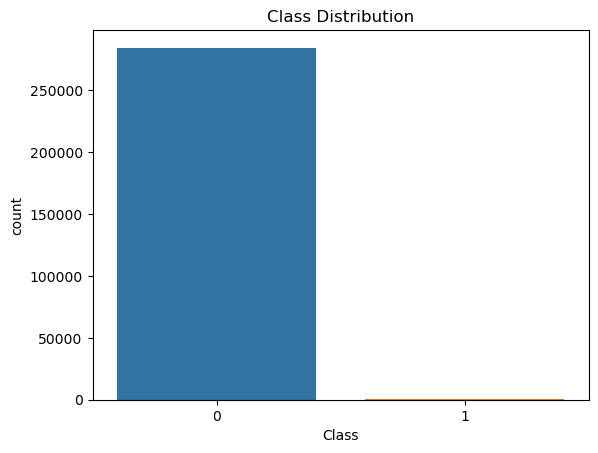

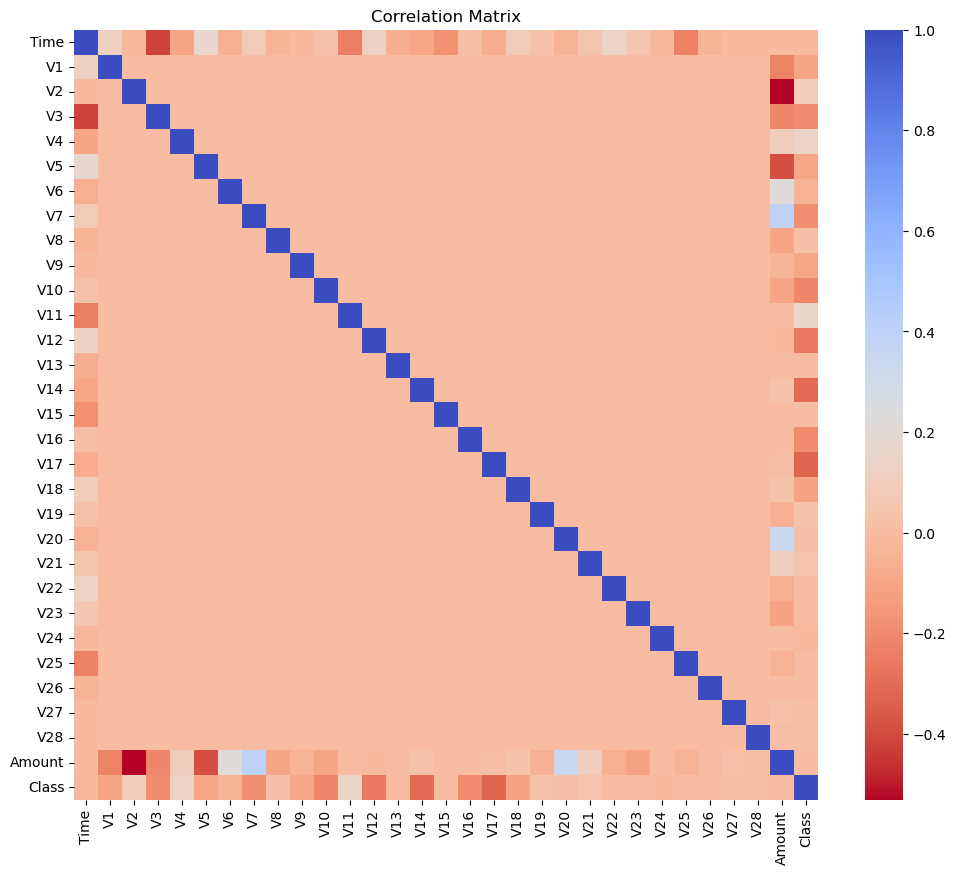

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix')
plt.show()

3. Data Cleaning

4. Handling Imbalanced Data


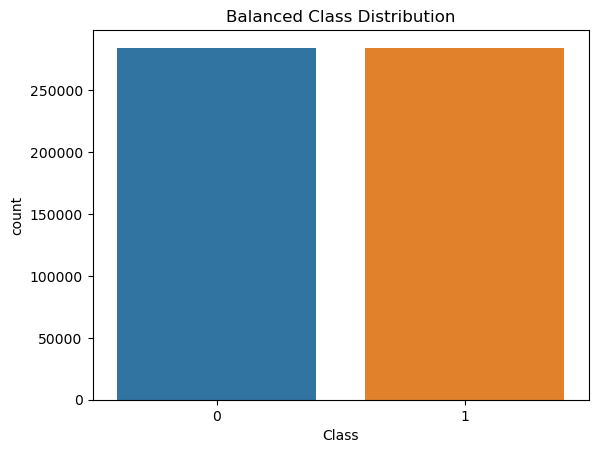

In [10]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Visualize the new class distribution
sns.countplot(x=y_res)
plt.title('Balanced Class Distribution')
plt.show()

5. Feature Engineering


6. Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)


7. Model Selection and Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


8. Model Validation

In [ ]:


from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_res, y_res, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())



9. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print('Best Model Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))


10. Model Deployment Plan


In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'credit_card_fraud_model.pkl')

# Example Flask app for model deployment
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('credit_card_fraud_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


11. Documentation and Packaging

In [ ]:
Create a README file explaining:
Installation steps
Usage instructions
Explanation of the code and structure
Package the source code, model file, and README into a zip file.